## Linear Regression Models

### Kathryn Clark
### 11/15/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

%matplotlib inline

In [2]:
# change display options (comment out if not wanted)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
# set current path
# set file location on your local machine
dataLoc = '../data/dataWithFeatures.csv'

In [4]:
# load dataset
df = pd.read_csv(dataLoc)
df.head()

,Confirmed Cases,Zip Code,ZIP,PlaceName,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DIABETES,MHLTH,PHLTH,TEETHLOST,STROKE,ACCESS2,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,PAPTEST,COLON_SCREEN,COREM,COREW,totalPop,whiteAlonePop,blackAlonePop,nativeAlonePop,asianAlonePop,hawaiiAlonePop,otherAlonePop,twoOrMorePop,COVID_perc,white_perc,black_perc,native_perc,asian_perc,hawaii_perc,other_perc,two_plus_perc,majorityWhite,majorityBlack,raciallyDiverse
0,2601,2128,2128,"Boston, MA",23.008333,20.275000,28.833333,27.583333,36.558333,17.575000,10.591667,23.616667,4.633333,29.791667,2.800000,6.075000,4.783333,9.475000,16.050000,13.375000,22.433333,2.675000,17.783333,69.241667,58.550000,66.133333,73.291667,81.366667,84.416667,57.000000,25.125000,25.550000,40508.0,26243.0,1812.0,211.0,1449.0,19.0,8711.0,2063.0,0.064210,0.647847,0.044732,0.005209,0.035771,0.000469,0.215044,0.050928,1,0,0
1,954,2126,2126,"Boston, MA",18.057189,21.847786,31.386494,35.463870,43.639785,23.373010,13.418726,36.511605,5.214682,32.074859,3.681542,7.036310,5.575139,14.462815,16.165012,14.680967,23.960329,4.335803,13.157455,79.025974,56.448714,75.861488,80.072242,85.981710,86.997140,61.376745,19.084358,22.874948,25562.0,1490.0,21444.0,144.0,223.0,10.0,1327.0,924.0,0.037321,0.058290,0.838901,0.005633,0.008724,0.000391,0.051913,0.036147,0,1,0
2,1373,2136,2136,"Boston, MA",19.961506,16.622498,25.202788,28.578007,37.412242,22.449622,11.606299,30.759341,6.243358,32.402611,3.061578,5.932190,5.113992,11.157361,13.372236,12.088342,15.135684,3.240098,10.097480,77.374526,68.921011,75.748791,82.169142,84.357523,86.889788,66.691533,27.618903,29.369671,28488.0,10498.0,13234.0,117.0,506.0,23.0,2917.0,1193.0,0.048196,0.368506,0.464546,0.004107,0.017762,0.000807,0.102394,0.041877,0,0,1
3,817,2122,2122,"Boston, MA",19.819455,20.351389,27.799670,26.896977,39.685733,20.303802,11.811055,28.120982,5.290523,31.251717,3.038413,6.378675,5.039854,10.867838,15.580917,13.253754,21.087878,3.223264,12.337218,74.276702,59.803426,72.873963,77.002053,82.424859,83.062404,59.244173,23.692999,24.650161,23479.0,8766.0,6721.0,81.0,4058.0,13.0,2611.0,1229.0,0.034797,0.373355,0.286256,0.003450,0.172835,0.000554,0.111206,0.052345,0,0,1
4,1820,2124,2124,"Boston, MA",18.117139,20.930778,29.916522,32.623248,41.538029,22.336018,13.056785,33.337175,5.239586,31.873505,3.454567,6.814463,5.290359,13.227608,16.177045,14.217211,21.455362,3.902976,12.679894,77.663985,59.973397,75.462107,79.057873,85.159565,85.870091,62.141693,21.872265,24.671689,47783.0,10057.0,28141.0,225.0,2972.0,12.0,4068.0,2308.0,0.038089,0.210472,0.588933,0.004709,0.062198,0.000251,0.085135,0.048302,0,1,0


In [5]:
df['PlaceName'].unique()

array(['Boston, MA', 'Miami, FL', 'El Paso, TX', 'Atlanta, GA',
       'Houston, TX', 'Chicago, IL', 'Minneapolis, MN', 'Phoenix, AZ',
       'San Francisco, CA'], dtype=object)

In [6]:
df['nonwhite_perc'] = 1 - df['white_perc']
df['other_perc2'] = df['native_perc'] + df['hawaii_perc'] + df['other_perc']
df.head()

,Confirmed Cases,Zip Code,ZIP,PlaceName,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DIABETES,MHLTH,PHLTH,TEETHLOST,STROKE,ACCESS2,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,PAPTEST,COLON_SCREEN,COREM,COREW,totalPop,whiteAlonePop,blackAlonePop,nativeAlonePop,asianAlonePop,hawaiiAlonePop,otherAlonePop,twoOrMorePop,COVID_perc,white_perc,black_perc,native_perc,asian_perc,hawaii_perc,other_perc,two_plus_perc,majorityWhite,majorityBlack,raciallyDiverse,nonwhite_perc,other_perc2
0,2601,2128,2128,"Boston, MA",23.008333,20.275000,28.833333,27.583333,36.558333,17.575000,10.591667,23.616667,4.633333,29.791667,2.800000,6.075000,4.783333,9.475000,16.050000,13.375000,22.433333,2.675000,17.783333,69.241667,58.550000,66.133333,73.291667,81.366667,84.416667,57.000000,25.125000,25.550000,40508.0,26243.0,1812.0,211.0,1449.0,19.0,8711.0,2063.0,0.064210,0.647847,0.044732,0.005209,0.035771,0.000469,0.215044,0.050928,1,0,0,0.352153,0.220722
1,954,2126,2126,"Boston, MA",18.057189,21.847786,31.386494,35.463870,43.639785,23.373010,13.418726,36.511605,5.214682,32.074859,3.681542,7.036310,5.575139,14.462815,16.165012,14.680967,23.960329,4.335803,13.157455,79.025974,56.448714,75.861488,80.072242,85.981710,86.997140,61.376745,19.084358,22.874948,25562.0,1490.0,21444.0,144.0,223.0,10.0,1327.0,924.0,0.037321,0.058290,0.838901,0.005633,0.008724,0.000391,0.051913,0.036147,0,1,0,0.941710,0.057938
2,1373,2136,2136,"Boston, MA",19.961506,16.622498,25.202788,28.578007,37.412242,22.449622,11.606299,30.759341,6.243358,32.402611,3.061578,5.932190,5.113992,11.157361,13.372236,12.088342,15.135684,3.240098,10.097480,77.374526,68.921011,75.748791,82.169142,84.357523,86.889788,66.691533,27.618903,29.369671,28488.0,10498.0,13234.0,117.0,506.0,23.0,2917.0,1193.0,0.048196,0.368506,0.464546,0.004107,0.017762,0.000807,0.102394,0.041877,0,0,1,0.631494,0.107308
3,817,2122,2122,"Boston, MA",19.819455,20.351389,27.799670,26.896977,39.685733,20.303802,11.811055,28.120982,5.290523,31.251717,3.038413,6.378675,5.039854,10.867838,15.580917,13.253754,21.087878,3.223264,12.337218,74.276702,59.803426,72.873963,77.002053,82.424859,83.062404,59.244173,23.692999,24.650161,23479.0,8766.0,6721.0,81.0,4058.0,13.0,2611.0,1229.0,0.034797,0.373355,0.286256,0.003450,0.172835,0.000554,0.111206,0.052345,0,0,1,0.626645,0.115209
4,1820,2124,2124,"Boston, MA",18.117139,20.930778,29.916522,32.623248,41.538029,22.336018,13.056785,33.337175,5.239586,31.873505,3.454567,6.814463,5.290359,13.227608,16.177045,14.217211,21.455362,3.902976,12.679894,77.663985,59.973397,75.462107,79.057873,85.159565,85.870091,62.141693,21.872265,24.671689,47783.0,10057.0,28141.0,225.0,2972.0,12.0,4068.0,2308.0,0.038089,0.210472,0.588933,0.004709,0.062198,0.000251,0.085135,0.048302,0,1,0,0.789528,0.090095


In [7]:
df[df['COVID_perc'].isna()]

,Confirmed Cases,Zip Code,ZIP,PlaceName,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DIABETES,MHLTH,PHLTH,TEETHLOST,STROKE,ACCESS2,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,PAPTEST,COLON_SCREEN,COREM,COREW,totalPop,whiteAlonePop,blackAlonePop,nativeAlonePop,asianAlonePop,hawaiiAlonePop,otherAlonePop,twoOrMorePop,COVID_perc,white_perc,black_perc,native_perc,asian_perc,hawaii_perc,other_perc,two_plus_perc,majorityWhite,majorityBlack,raciallyDiverse,nonwhite_perc,other_perc2
69,11,30301,30301,"Atlanta, GA",18.7,19.5,30.0,31.7,41.0,13.8,10.1,27.7,3.3,23.6,2.7,5.2,4.1,9.0,15.0,10.2,21.8,2.9,22.6,70.2,54.8,69.6,73.3,84.1,83.0,58.0,23.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN
85,10,30321,30321,"Atlanta, GA",12.4,26.1,42.0,42.9,47.0,24.7,11.8,45.3,5.1,33.6,4.7,9.8,7.8,18.5,17.1,17.0,30.1,6.1,29.4,77.9,43.7,81.5,80.4,85.0,84.0,53.4,19.3,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN
308,7,55458,55458,"Minneapolis, MN",24.4,14.8,21.0,25.0,30.0,13.7,7.4,21.5,4.8,25.0,2.2,3.5,3.9,6.0,9.7,7.9,9.1,2.1,11.1,66.3,72.1,67.4,75.6,81.6,84.0,68.8,37.6,38.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN
358,NaN,94104,94104,"San Francisco, CA",18.0,14.3,20.0,18.2,32.5,17.6,8.0,28.5,5.2,32.5,2.9,4.9,5.4,11.0,11.5,11.5,10.7,3.0,11.3,67.3,63.7,71.0,79.2,77.7,78.0,61.5,29.8,28.0,406.0,140.0,12.0,2.0,226.0,0.0,20.0,6.0,NaN,0.344828,0.029557,0.004926,0.55665,0.0,0.049261,0.014778,0,0,0,0.655172,0.054187


In [8]:
df[df['nonwhite_perc'].isna()]

,Confirmed Cases,Zip Code,ZIP,PlaceName,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DIABETES,MHLTH,PHLTH,TEETHLOST,STROKE,ACCESS2,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,PAPTEST,COLON_SCREEN,COREM,COREW,totalPop,whiteAlonePop,blackAlonePop,nativeAlonePop,asianAlonePop,hawaiiAlonePop,otherAlonePop,twoOrMorePop,COVID_perc,white_perc,black_perc,native_perc,asian_perc,hawaii_perc,other_perc,two_plus_perc,majorityWhite,majorityBlack,raciallyDiverse,nonwhite_perc,other_perc2
69,11,30301,30301,"Atlanta, GA",18.7,19.5,30.0,31.7,41.0,13.8,10.1,27.7,3.3,23.6,2.7,5.2,4.1,9.0,15.0,10.2,21.8,2.9,22.6,70.2,54.8,69.6,73.3,84.1,83.0,58.0,23.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN
85,10,30321,30321,"Atlanta, GA",12.4,26.1,42.0,42.9,47.0,24.7,11.8,45.3,5.1,33.6,4.7,9.8,7.8,18.5,17.1,17.0,30.1,6.1,29.4,77.9,43.7,81.5,80.4,85.0,84.0,53.4,19.3,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN
308,7,55458,55458,"Minneapolis, MN",24.4,14.8,21.0,25.0,30.0,13.7,7.4,21.5,4.8,25.0,2.2,3.5,3.9,6.0,9.7,7.9,9.1,2.1,11.1,66.3,72.1,67.4,75.6,81.6,84.0,68.8,37.6,38.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN


In [9]:
df.dropna(subset=['COVID_perc'], inplace=True)

In [ ]:
#df[df['PAPTEST'].isna()] #.isna().sum()
# all of Phoenix, AZ has missing PAPTEST?

In [10]:
# convert to same scale (mult COVID & races by 100)
for i in ['COVID_perc', 'white_perc', 'black_perc', 'native_perc', 'asian_perc', 
          'hawaii_perc', 'other_perc', 'two_plus_perc', 'nonwhite_perc', 'other_perc2']:
    df[i] = df[i] * 100
    
df.head()

,Confirmed Cases,Zip Code,ZIP,PlaceName,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DIABETES,MHLTH,PHLTH,TEETHLOST,STROKE,ACCESS2,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,PAPTEST,COLON_SCREEN,COREM,COREW,totalPop,whiteAlonePop,blackAlonePop,nativeAlonePop,asianAlonePop,hawaiiAlonePop,otherAlonePop,twoOrMorePop,COVID_perc,white_perc,black_perc,native_perc,asian_perc,hawaii_perc,other_perc,two_plus_perc,majorityWhite,majorityBlack,raciallyDiverse,nonwhite_perc,other_perc2
0,2601,2128,2128,"Boston, MA",23.008333,20.275000,28.833333,27.583333,36.558333,17.575000,10.591667,23.616667,4.633333,29.791667,2.800000,6.075000,4.783333,9.475000,16.050000,13.375000,22.433333,2.675000,17.783333,69.241667,58.550000,66.133333,73.291667,81.366667,84.416667,57.000000,25.125000,25.550000,40508.0,26243.0,1812.0,211.0,1449.0,19.0,8711.0,2063.0,6.420954,64.784734,4.473190,0.520885,3.577071,0.046904,21.504394,5.092821,1,0,0,35.215266,22.072183
1,954,2126,2126,"Boston, MA",18.057189,21.847786,31.386494,35.463870,43.639785,23.373010,13.418726,36.511605,5.214682,32.074859,3.681542,7.036310,5.575139,14.462815,16.165012,14.680967,23.960329,4.335803,13.157455,79.025974,56.448714,75.861488,80.072242,85.981710,86.997140,61.376745,19.084358,22.874948,25562.0,1490.0,21444.0,144.0,223.0,10.0,1327.0,924.0,3.732102,5.828965,83.890149,0.563336,0.872389,0.039121,5.191300,3.614741,0,1,0,94.171035,5.793756
2,1373,2136,2136,"Boston, MA",19.961506,16.622498,25.202788,28.578007,37.412242,22.449622,11.606299,30.759341,6.243358,32.402611,3.061578,5.932190,5.113992,11.157361,13.372236,12.088342,15.135684,3.240098,10.097480,77.374526,68.921011,75.748791,82.169142,84.357523,86.889788,66.691533,27.618903,29.369671,28488.0,10498.0,13234.0,117.0,506.0,23.0,2917.0,1193.0,4.819573,36.850604,46.454648,0.410699,1.776186,0.080736,10.239399,4.187728,0,0,1,63.149396,10.730834
3,817,2122,2122,"Boston, MA",19.819455,20.351389,27.799670,26.896977,39.685733,20.303802,11.811055,28.120982,5.290523,31.251717,3.038413,6.378675,5.039854,10.867838,15.580917,13.253754,21.087878,3.223264,12.337218,74.276702,59.803426,72.873963,77.002053,82.424859,83.062404,59.244173,23.692999,24.650161,23479.0,8766.0,6721.0,81.0,4058.0,13.0,2611.0,1229.0,3.479705,37.335491,28.625580,0.344989,17.283530,0.055369,11.120576,5.234465,0,0,1,62.664509,11.520934
4,1820,2124,2124,"Boston, MA",18.117139,20.930778,29.916522,32.623248,41.538029,22.336018,13.056785,33.337175,5.239586,31.873505,3.454567,6.814463,5.290359,13.227608,16.177045,14.217211,21.455362,3.902976,12.679894,77.663985,59.973397,75.462107,79.057873,85.159565,85.870091,62.141693,21.872265,24.671689,47783.0,10057.0,28141.0,225.0,2972.0,12.0,4068.0,2308.0,3.808886,21.047234,58.893330,0.470879,6.219785,0.025114,8.513488,4.830170,0,1,0,78.952766,9.009480


<AxesSubplot:>

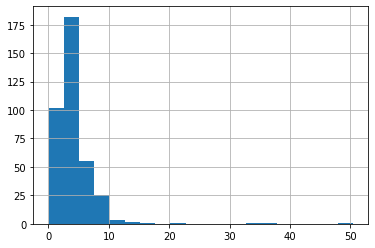

In [23]:
df['COVID_perc'].hist(bins=20)

<AxesSubplot:xlabel='COVID_perc'>

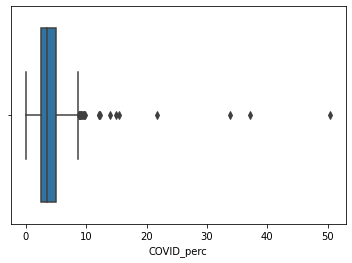

In [32]:
sns.boxplot(x=df['COVID_perc'])

In [35]:
from scipy import stats
z = np.abs(stats.zscore(df['COVID_perc']))
threshold = 3
print(np.where(z > 3))

(array([16, 30, 38, 55]),)


In [36]:
df[df['COVID_perc'] > 20]

,Confirmed Cases,Zip Code,ZIP,PlaceName,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DIABETES,MHLTH,PHLTH,TEETHLOST,STROKE,ACCESS2,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,PAPTEST,COLON_SCREEN,COREM,COREW,totalPop,whiteAlonePop,blackAlonePop,nativeAlonePop,asianAlonePop,hawaiiAlonePop,otherAlonePop,twoOrMorePop,COVID_perc,white_perc,black_perc,native_perc,asian_perc,hawaii_perc,other_perc,two_plus_perc,majorityWhite,majorityBlack,raciallyDiverse,nonwhite_perc,other_perc2
16,1302,2163,2163,"Boston, MA",27.500000,13.900000,18.000000,16.000000,33.600000,5.200000,11.400000,8.800000,1.300000,11.900000,1.200000,2.300000,1.000000,2.200000,17.100000,6.100000,15.600000,0.700000,8.400000,65.700000,66.300000,33.500000,58.300000,82.500000,79.000000,61.200000,25.800000,25.600000,2582.0,1611.0,175.0,8.0,629.0,1.0,47.0,111.0,50.426026,62.393493,6.777692,0.309837,24.360960,0.038730,1.820294,4.298993,1,0,0,37.606507,2.168861
30,2813,33128,33128,"Miami, FL",14.778920,22.799267,42.450740,36.431049,36.972050,20.404141,7.569070,34.555506,4.896326,35.021814,4.416258,8.349818,8.765203,16.698818,16.541506,18.345167,22.517603,4.517435,43.800944,71.619970,44.739170,72.228610,76.669299,81.846009,81.157754,41.235167,18.408127,16.461290,7562.0,5859.0,771.0,46.0,7.0,0.0,552.0,327.0,37.199154,77.479503,10.195715,0.608305,0.092568,0.000000,7.299656,4.324253,1,0,0,22.520497,7.907961
38,2986,33136,33136,"Miami, FL",13.651679,25.683273,41.594226,38.165521,39.803283,22.557530,9.277611,37.890918,5.064471,34.282186,4.485191,10.023355,8.617952,16.508809,18.063171,18.710229,26.734688,5.362330,35.649507,74.773439,45.230023,74.521209,77.629386,83.651563,81.392946,43.900282,18.331892,16.996330,13791.0,4882.0,7607.0,76.0,204.0,12.0,547.0,463.0,21.651802,35.399898,55.159162,0.551084,1.479226,0.087013,3.966355,3.357262,0,1,0,64.600102,4.604452
55,529,79911,79911,"El Paso, TX",20.200357,10.421964,21.221429,29.654822,34.199821,13.988750,6.711071,22.677322,4.044464,26.110893,2.122143,2.822143,3.133214,8.866250,9.833036,8.744107,5.444107,1.622143,21.598750,64.122321,70.445714,67.988572,84.300536,82.022143,85.000000,62.433928,34.078571,33.323035,1565.0,1328.0,35.0,3.0,67.0,0.0,71.0,61.0,33.801917,84.856230,2.236422,0.191693,4.281150,0.000000,4.536741,3.897764,1,0,0,15.143770,4.728435


In [37]:
df = df[df['COVID_perc'] < 20]

<AxesSubplot:>

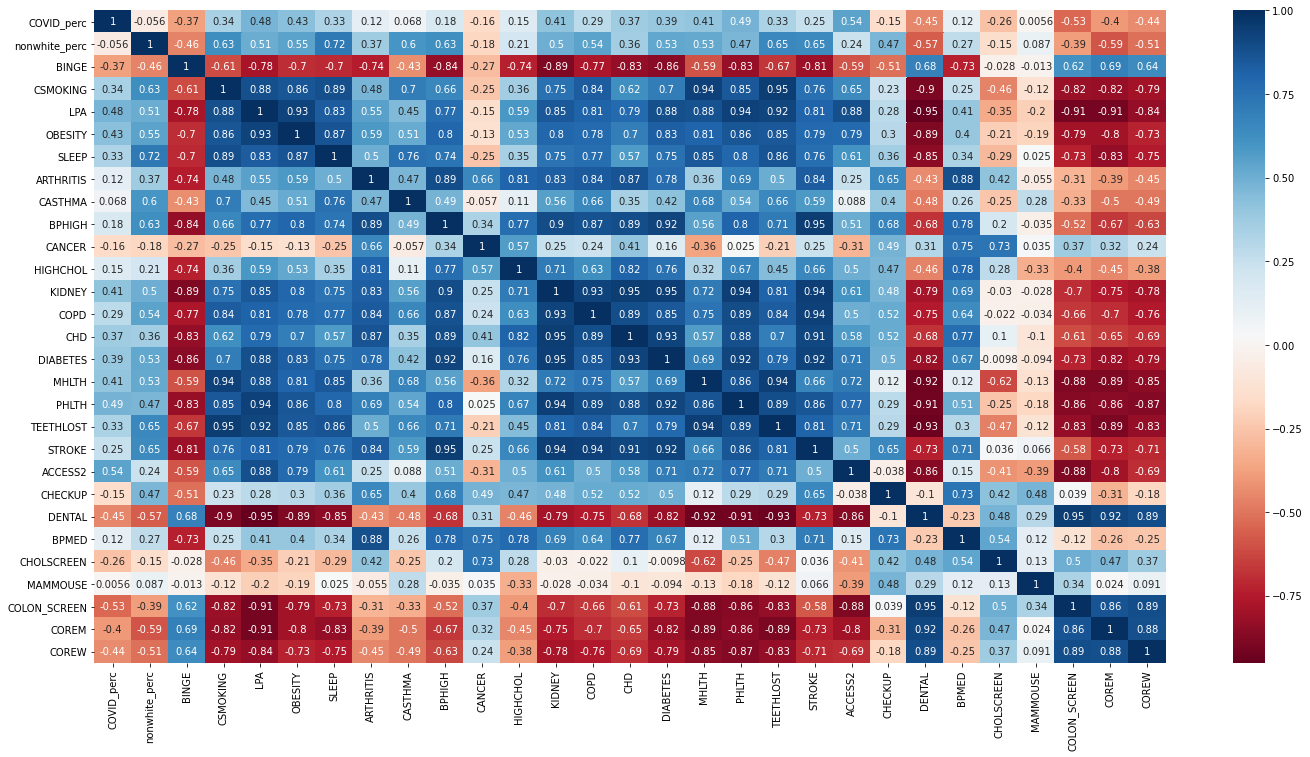

In [38]:
plt.figure(figsize=(24,12))

corr_mat = df[['COVID_perc', 'nonwhite_perc', 'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 
               'CASTHMA', 'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH',
               'TEETHLOST', 'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 
               'COLON_SCREEN', 'COREM', 'COREW']].corr()
sns.heatmap(corr_mat, annot = True, cmap="RdBu")

<AxesSubplot:>

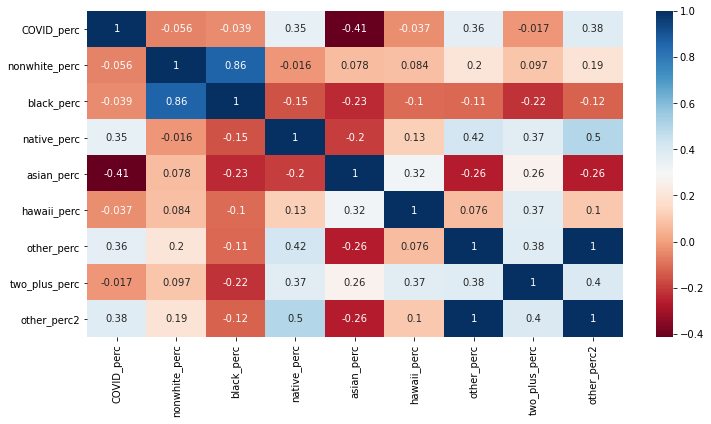

In [39]:
plt.figure(figsize=(12,6))

corr_mat = df[['COVID_perc', 'nonwhite_perc', 'black_perc', 'native_perc', 'asian_perc', 
               'hawaii_perc', 'other_perc', 'two_plus_perc', 'other_perc2']].corr()
sns.heatmap(corr_mat, annot = True, cmap="RdBu")

In [83]:
feature_list = ['nonwhite_perc', 'black_perc', 'native_perc', 'asian_perc', 'hawaii_perc', 'other_perc', 
                'two_plus_perc', 'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 
                'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH',
                'TEETHLOST', 'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 
                'COLON_SCREEN', 'COREM', 'COREW']
X = df[feature_list].copy()
y = df['COVID_perc']

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

In [84]:
for i in zip(feature_list, f_test):
    print(i)

('nonwhite_perc', 0.007342993126347804)
('black_perc', 0.003630631780004529)
('native_perc', 0.3349332329771741)
('asian_perc', 0.4871538187727634)
('hawaii_perc', 0.003329103337395206)
('other_perc', 0.3627200492351901)
('two_plus_perc', 0.0007066004107365507)
('BINGE', 0.3828432855913719)
('CSMOKING', 0.3107439655954484)
('LPA', 0.7116701615764769)
('OBESITY', 0.5521407415870643)
('SLEEP', 0.2823321362418748)
('ARTHRITIS', 0.035720722437369914)
('CASTHMA', 0.01091095617887683)
('BPHIGH', 0.0826634993340465)
('CANCER', 0.06215049150374345)
('HIGHCHOL', 0.0576717800273532)
('KIDNEY', 0.489382457578663)
('COPD', 0.21852969426428326)
('CHD', 0.3765993601189514)
('DIABETES', 0.42871682723118765)
('MHLTH', 0.47861466430322414)
('PHLTH', 0.7411198342920493)
('TEETHLOST', 0.29132608555216705)
('STROKE', 0.15430764960200355)
('ACCESS2', 1.0)
('CHECKUP', 0.05576758642690485)
('DENTAL', 0.6138714709898112)
('BPMED', 0.032260047164358895)
('CHOLSCREEN', 0.17577089185071526)
('MAMMOUSE', 7.431946

In [85]:
for i in zip(feature_list, mi):
    print(i)

('nonwhite_perc', 0.17129475833896127)
('black_perc', 0.28017174881983675)
('native_perc', 0.4768739534479086)
('asian_perc', 0.6984719264760347)
('hawaii_perc', 0.392211803096216)
('other_perc', 0.7058322001728955)
('two_plus_perc', 0.18930252909474785)
('BINGE', 0.46973657734430074)
('CSMOKING', 0.5982653587593042)
('LPA', 0.7019445528909415)
('OBESITY', 0.9689958182444305)
('SLEEP', 0.6772578729881477)
('ARTHRITIS', 0.1978926503620064)
('CASTHMA', 0.3478641138147499)
('BPHIGH', 0.352013807835064)
('CANCER', 0.141642104156488)
('HIGHCHOL', 0.12328712882655182)
('KIDNEY', 0.44740667041638116)
('COPD', 0.3444672697848088)
('CHD', 0.3661571151534273)
('DIABETES', 0.41060019590678554)
('MHLTH', 0.39923437734046907)
('PHLTH', 0.6088880282341017)
('TEETHLOST', 0.704507958789359)
('STROKE', 0.4105706072062168)
('ACCESS2', 1.0)
('CHECKUP', 0.03199196471164387)
('DENTAL', 0.5598471388407956)
('BPMED', 0.14147583803048736)
('CHOLSCREEN', 0.31604333375834764)
('MAMMOUSE', 0.255086504324624)
('C

In [43]:
mi = {}
feature_lists = {}

feature_list = ['nonwhite_perc', 'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 
                'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH',
                'TEETHLOST', 'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 
                'COLON_SCREEN', 'COREM', 'COREW']
X = df[feature_list].copy()
y = df['COVID_perc']
feature_lists['COVID_perc'] = feature_list
mi['COVID_perc'] = mutual_info_regression(X, y)
#mi['COVID_perc'] /= np.max(mi['COVID_perc'])

for i, feat in enumerate(feature_list):
    temp_list = feature_list[:i] + feature_list[i+1:]
    X = df[temp_list].copy()
    y = df[feat]
    feature_lists[feat] = temp_list
    mi[feat] = mutual_info_regression(X, y)
    #mi[feat] /= np.max(mi[feat])
    
mi

{'COVID_perc': array([0.05364794, 0.14711717, 0.18739829, 0.21937422, 0.30348056,
        0.21211092, 0.06197815, 0.10839771, 0.11024748, 0.04431359,
        0.03863219, 0.14012364, 0.10777952, 0.11466961, 0.1285962 ,
        0.12512662, 0.19061093, 0.2206454 , 0.12846408, 0.31319078,
        0.01001959, 0.17533896, 0.04430893, 0.09898186, 0.07989074,
        0.16025166, 0.13703451, 0.07386982]),
 'nonwhite_perc': array([0.24983663, 0.25275457, 0.27549823, 0.31952634, 0.4104542 ,
        0.20816876, 0.35935464, 0.31267625, 0.22406301, 0.0867095 ,
        0.16461373, 0.20858301, 0.16150645, 0.37885936, 0.11824049,
        0.17660709, 0.37770786, 0.285969  , 0.1660688 , 0.37116357,
        0.17830368, 0.26018559, 0.17643022, 0.15264515, 0.14850884,
        0.24645853, 0.2234271 ]),
 'BINGE': array([0.24983663, 0.27065685, 0.48581406, 0.5467048 , 0.3784133 ,
        0.54653034, 0.17645144, 0.79800677, 0.15706441, 0.45004948,
        0.94854983, 0.53535164, 0.7173353 , 0.8834887 , 0.243007

In [44]:
selected_features = []
k = 10

# find best feature first
best_idx = np.where(mi['COVID_perc'] == max(mi['COVID_perc']))[0][0]
selected_features.append(feature_lists['COVID_perc'][best_idx])

# remove selected feature from consideration
new_arr = np.delete(mi['COVID_perc'], best_idx)
new_feats = np.delete(feature_lists['COVID_perc'], best_idx)

# find next k features
for kk in range(k-1):

    #redun = 0 if kk == 0 else reduns[selected_features[-1]]
    
    scores = []
    #reduns = {}
    for i, feat in enumerate(new_feats):
        # get relevance score
        rel = new_arr[i]

        # add to redun score
        temp_redun = 0 #redun
        for j in selected_features:
            temp_idx = feature_lists[j].index(feat)
            temp_redun = temp_redun + mi[j][temp_idx]

        # keep track of score
        #reduns[feat] = temp_redun
        scores.append(rel - (1/((kk+2) - 1))*temp_redun)

    best_idx = np.argmax(np.array(scores))
    selected_features.append(new_feats[best_idx])
    
    # remove selected feature from consideration
    new_arr = np.delete(new_arr, best_idx)
    new_feats = np.delete(new_feats, best_idx)

selected_features

['ACCESS2',
 'BPMED',
 'CASTHMA',
 'CHOLSCREEN',
 'OBESITY',
 'MAMMOUSE',
 'BINGE',
 'TEETHLOST',
 'CANCER',
 'SLEEP']

In [46]:
mi_black = {}
feature_lists = {}

feature_list = ['black_perc', 'asian_perc', 'other_perc2', 'two_plus_perc', 
                'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 
                'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH',
                'TEETHLOST', 'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 
                'COLON_SCREEN', 'COREM', 'COREW']
X = df[feature_list].copy()
y = df['COVID_perc']
feature_lists['COVID_perc'] = feature_list
mi_black['COVID_perc'] = mutual_info_regression(X, y)

for i, feat in enumerate(feature_list):
    temp_list = feature_list[:i] + feature_list[i+1:]
    X = df[temp_list].copy()
    y = df[feat]
    feature_lists[feat] = temp_list
    mi_black[feat] = mutual_info_regression(X, y)

In [47]:
selected_features_black = []
k = 10

# find best feature first
best_idx = np.where(mi_black['COVID_perc'] == max(mi_black['COVID_perc']))[0][0]
selected_features_black.append(feature_lists['COVID_perc'][best_idx])

# remove selected feature from consideration
new_arr = np.delete(mi_black['COVID_perc'], best_idx)
new_feats = np.delete(feature_lists['COVID_perc'], best_idx)

# find next k features
for kk in range(k-1):
    
    scores = []
    for i, feat in enumerate(new_feats):
        # get relevance score
        rel = new_arr[i]

        # add to redun score
        temp_redun = 0
        for j in selected_features_black:
            temp_idx = feature_lists[j].index(feat)
            temp_redun = temp_redun + mi_black[j][temp_idx]

        # keep track of score
        scores.append(rel - (1/((kk+2) - 1))*temp_redun)

    best_idx = np.argmax(np.array(scores))
    selected_features_black.append(new_feats[best_idx])
    
    # remove selected feature from consideration
    new_arr = np.delete(new_arr, best_idx)
    new_feats = np.delete(new_feats, best_idx)

selected_features_black

['ACCESS2',
 'two_plus_perc',
 'asian_perc',
 'CASTHMA',
 'other_perc2',
 'CANCER',
 'BINGE',
 'TEETHLOST',
 'MAMMOUSE',
 'CHOLSCREEN']

In [48]:
mi_norace = {}
feature_lists = {}

feature_list = ['BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 
                'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH',
                'TEETHLOST', 'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 
                'COLON_SCREEN', 'COREM', 'COREW']
X = df[feature_list].copy()
y = df['COVID_perc']
feature_lists['COVID_perc'] = feature_list
mi_norace['COVID_perc'] = mutual_info_regression(X, y)

for i, feat in enumerate(feature_list):
    temp_list = feature_list[:i] + feature_list[i+1:]
    X = df[temp_list].copy()
    y = df[feat]
    feature_lists[feat] = temp_list
    mi_norace[feat] = mutual_info_regression(X, y)

In [49]:
selected_features_norace = []
k = 10

# find best feature first
best_idx = np.where(mi_norace['COVID_perc'] == max(mi_norace['COVID_perc']))[0][0]
selected_features_norace.append(feature_lists['COVID_perc'][best_idx])

# remove selected feature from consideration
new_arr = np.delete(mi_norace['COVID_perc'], best_idx)
new_feats = np.delete(feature_lists['COVID_perc'], best_idx)

# find next k features
for kk in range(k-1):
    
    scores = []
    for i, feat in enumerate(new_feats):
        # get relevance score
        rel = new_arr[i]

        # add to redun score
        temp_redun = 0
        for j in selected_features_norace:
            temp_idx = feature_lists[j].index(feat)
            temp_redun = temp_redun + mi_norace[j][temp_idx]

        # keep track of score
        scores.append(rel - (1/((kk+2) - 1))*temp_redun)

    best_idx = np.argmax(np.array(scores))
    selected_features_norace.append(new_feats[best_idx])
    
    # remove selected feature from consideration
    new_arr = np.delete(new_arr, best_idx)
    new_feats = np.delete(new_feats, best_idx)

selected_features_norace

['ACCESS2',
 'BPMED',
 'CASTHMA',
 'CHOLSCREEN',
 'OBESITY',
 'MAMMOUSE',
 'BINGE',
 'TEETHLOST',
 'CANCER',
 'SLEEP']

In [ ]:
#I(Xj,Y) - 1/(m-1)*sum(I(Xi, Xj))

Text(0, 0.5, 'Number Zip Codes')

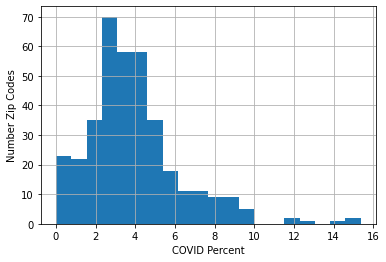

In [96]:
ax = df['COVID_perc'].hist(bins=20)
ax.set_xlabel('COVID Percent')
ax.set_ylabel('Number Zip Codes')

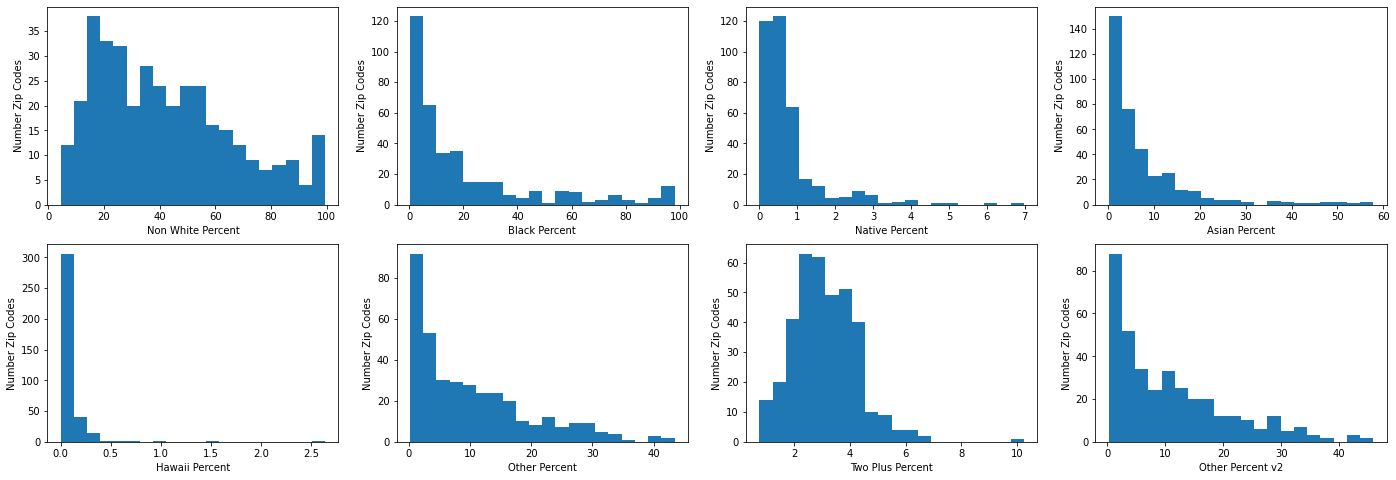

In [50]:
races = ['nonwhite_perc', 'black_perc', 'native_perc', 'asian_perc', 
         'hawaii_perc', 'other_perc', 'two_plus_perc', 'other_perc2']

xaxes = ['Non White Percent', 'Black Percent', 'Native Percent', 'Asian Percent',
         'Hawaii Percent', 'Other Percent', 'Two Plus Percent', 'Other Percent v2']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24, 8))

i = 0
for row in range(2):
    for col in range(4):
        ax[row, col].hist(df[races[i]], bins=20)
        ax[row, col].set_xlabel(xaxes[i])
        ax[row, col].set_ylabel('Number Zip Codes')
        i = i + 1

plt.show()

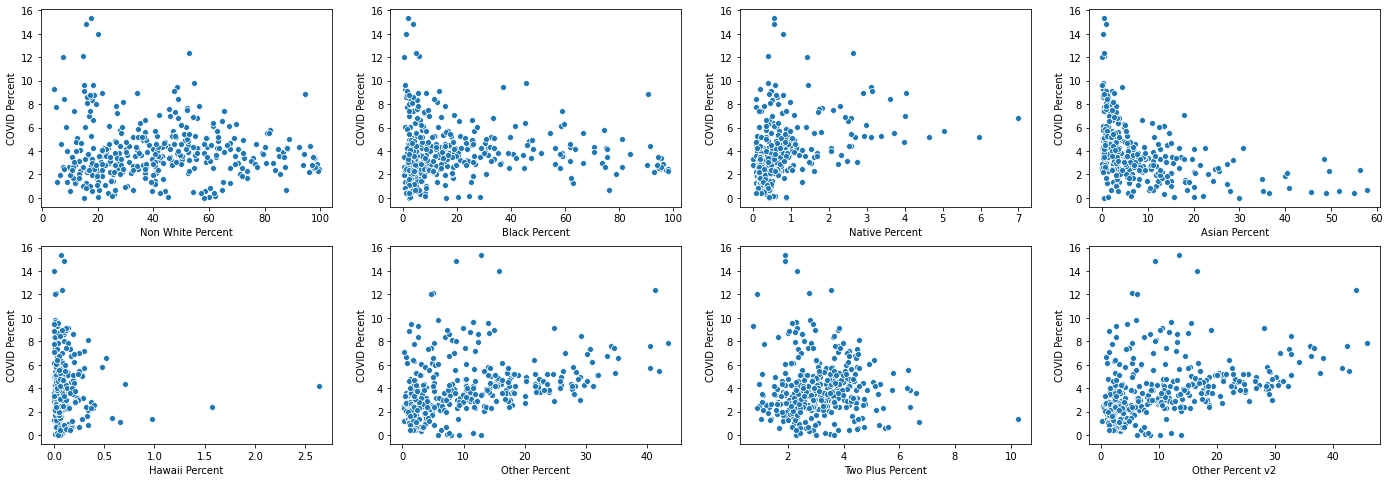

In [53]:
races = ['nonwhite_perc', 'black_perc', 'native_perc', 'asian_perc', 
         'hawaii_perc', 'other_perc', 'two_plus_perc', 'other_perc2']

xaxes = ['Non White Percent', 'Black Percent', 'Native Percent', 'Asian Percent',
         'Hawaii Percent', 'Other Percent', 'Two Plus Percent', 'Other Percent v2']
    
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24, 8))

i = 0
for row in range(2):
    for col in range(4):
        sns.scatterplot(x=races[i], y='COVID_perc', data=df, ax=ax[row, col])
        ax[row, col].set_xlabel(xaxes[i])
        ax[row, col].set_ylabel('COVID Percent')
        i = i + 1

plt.show()

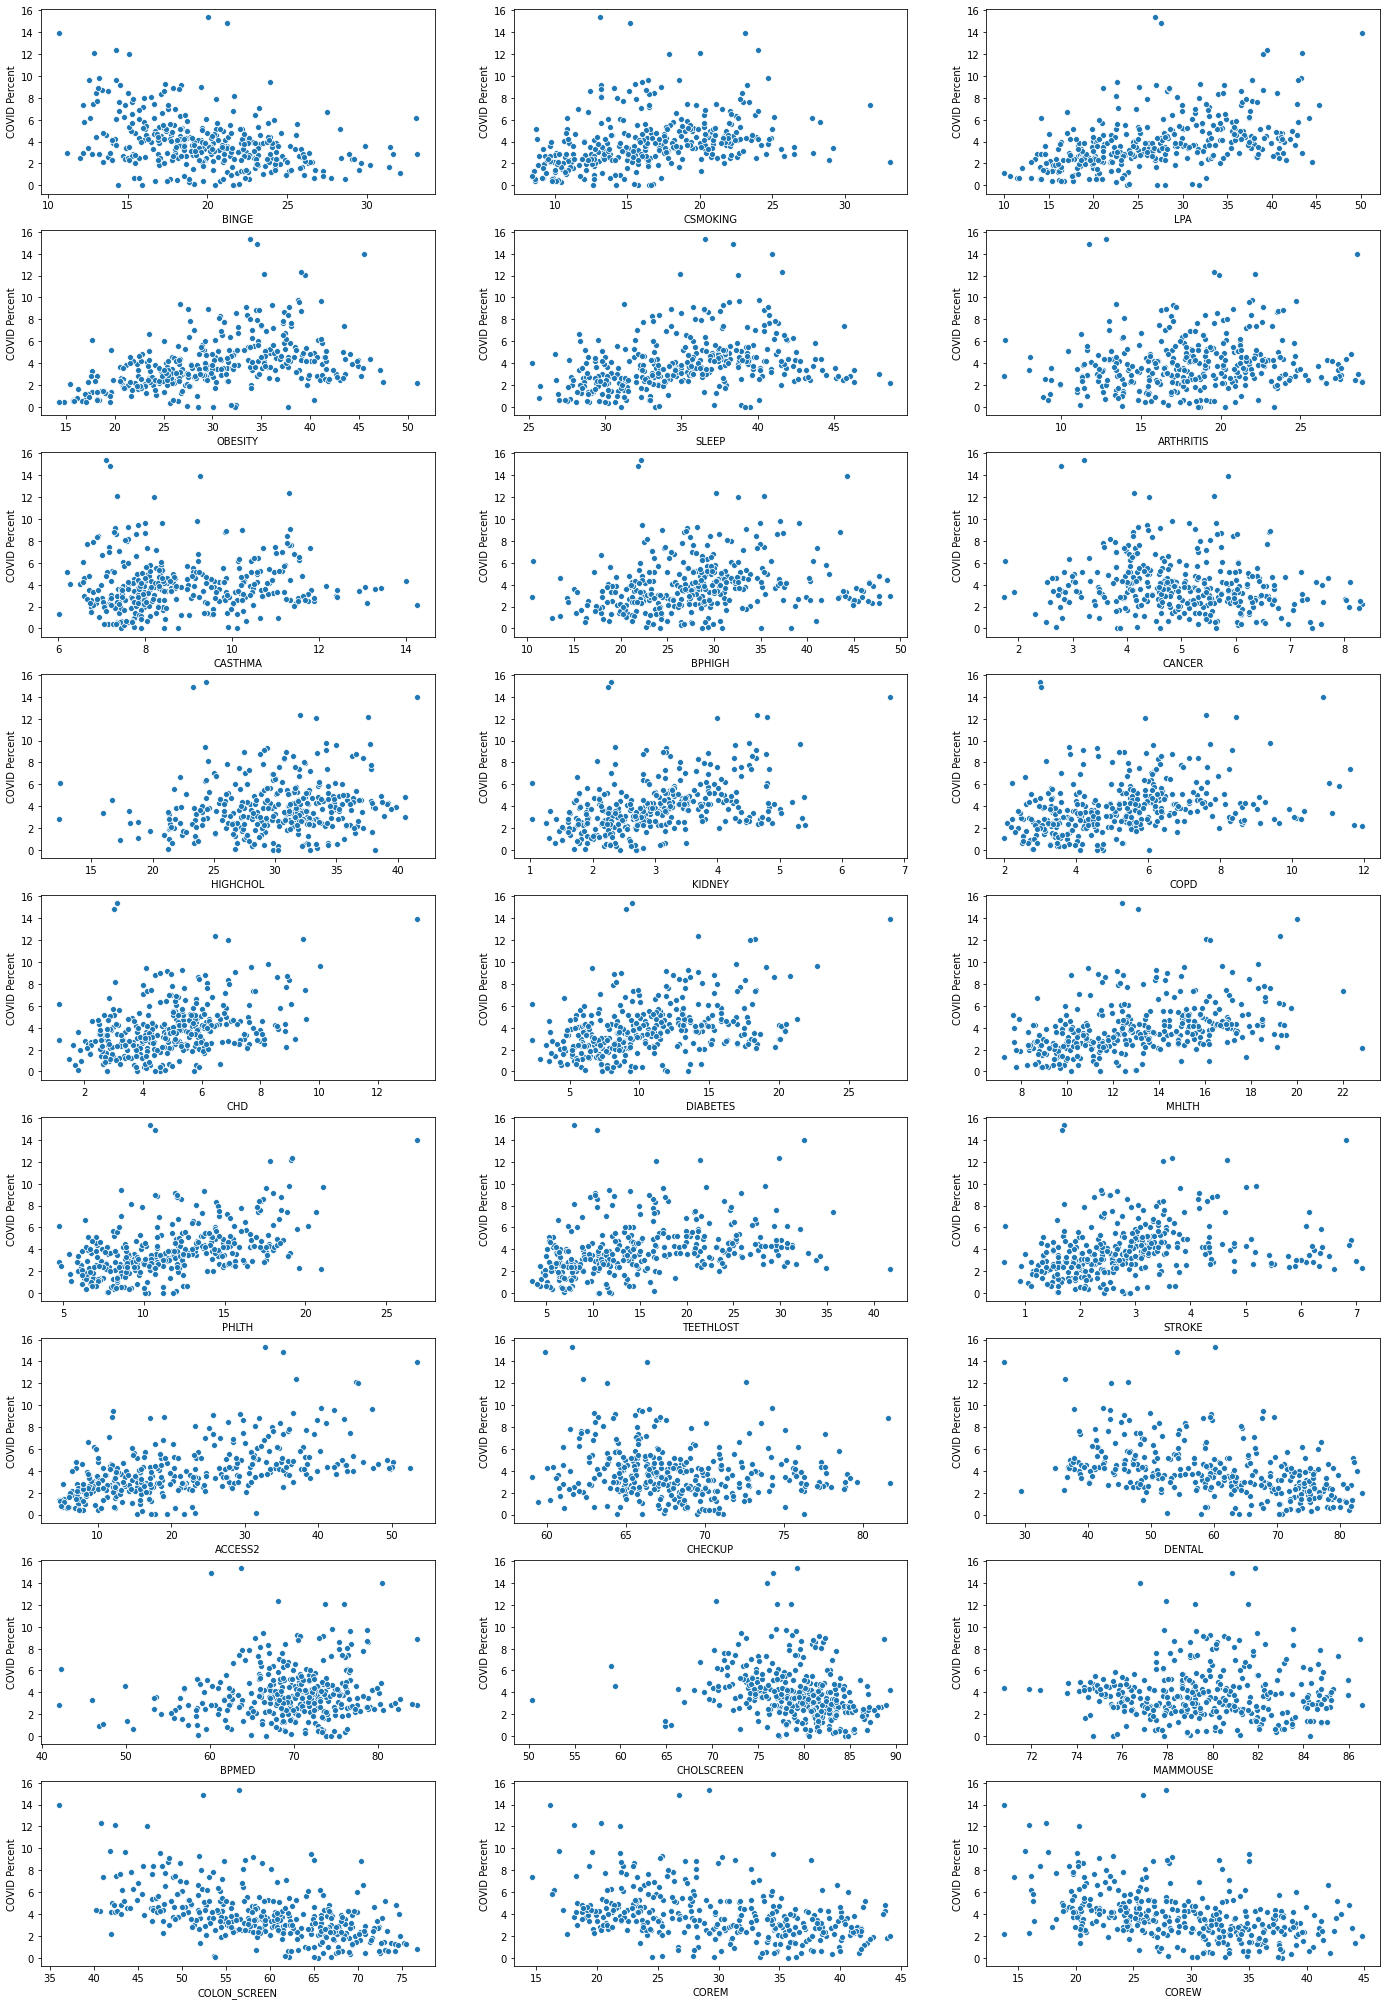

In [54]:
feats = ['BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 
         'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH',
         'TEETHLOST', 'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 
         'COLON_SCREEN', 'COREM', 'COREW']

fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(24, 36))

i = 0
for row in range(9):
    for col in range(3):
        sns.scatterplot(x=feats[i], y='COVID_perc', data=df, ax=ax[row, col])
        ax[row, col].set_ylabel('COVID Percent')
        i = i + 1

plt.show()

In [97]:
selected_features

['ACCESS2',
 'BPMED',
 'CASTHMA',
 'CHOLSCREEN',
 'OBESITY',
 'MAMMOUSE',
 'BINGE',
 'TEETHLOST',
 'CANCER',
 'SLEEP']

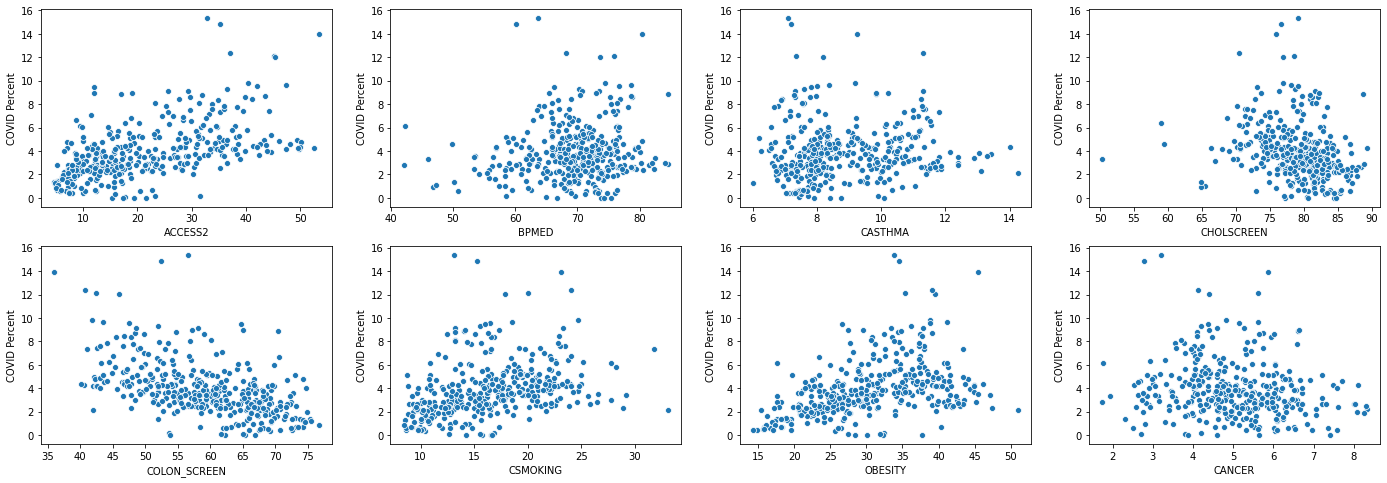

In [101]:
feats = ['ACCESS2', 'BPMED', 'CASTHMA', 'CHOLSCREEN', 'COLON_SCREEN', 'CSMOKING', 'OBESITY', 'CANCER']
    
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24, 8))

i = 0
for row in range(2):
    for col in range(4):
        sns.scatterplot(x=feats[i], y='COVID_perc', data=df, ax=ax[row, col])
        ax[row, col].set_ylabel('COVID Percent')
        i = i + 1

plt.show()

In [55]:
X = df["nonwhite_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.140
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.286
Time:                        23:37:25   Log-Likelihood:                -846.98
No. Observations:                 370   AIC:                             1698.
Df Residuals:                     368   BIC:                             1706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1619      0.251     16.609      0.000       3.669       4.655
nonwhite_perc    -0.0055      0.005     -1.068      0.286      -0.016       0.005
==============================================================================
Omnibus:                      101.789   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.869
Skew:                           1.327   Prob(JB):                     6.13e-57
Kurtosis:                       6.122   Cond. No.                         97.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X = df["black_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5636
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.453
Time:                        23:37:35   Log-Likelihood:                -847.27
No. Observations:                 370   AIC:                             1699.
Df Residuals:                     368   BIC:                             1706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0072      0.162     24.766      0.000       3.689       4.325
black_perc    -0.0038      0.005     -0.751      0.453      -0.014       0.006
==============================================================================
Omnibus:                      104.545   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.203
Skew:                           1.351   Prob(JB):                     4.73e-60
Kurtosis:                       6.228   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X = df["native_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     52.00
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.19e-12
Time:                        23:37:35   Log-Likelihood:                -823.11
No. Observations:                 370   AIC:                             1650.
Df Residuals:                     368   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1926      0.155     20.583      0.000       2.888       3.498
native_perc     0.9479      0.131      7.211      0.000       0.689       1.206
==============================================================================
Omnibus:                      138.784   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.375
Skew:                           1.648   Prob(JB):                    4.50e-113
Kurtosis:                       7.763   Cond. No.                         2.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = df["asian_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     75.63
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.15e-16
Time:                        23:37:36   Log-Likelihood:                -812.98
No. Observations:                 370   AIC:                             1630.
Df Residuals:                     368   BIC:                             1638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6749      0.142     32.867      0.000       4.395       4.955
asian_perc    -0.0992      0.011     -8.696      0.000      -0.122      -0.077
==============================================================================
Omnibus:                      112.830   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.171
Skew:                           1.410   Prob(JB):                     2.02e-72
Kurtosis:                       6.669   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X = df["hawaii_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5168
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.473
Time:                        23:37:36   Log-Likelihood:                -847.30
No. Observations:                 370   AIC:                             1699.
Df Residuals:                     368   BIC:                             1706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9742      0.139     28.571      0.000       3.701       4.248
hawaii_perc    -0.4797      0.667     -0.719      0.473      -1.792       0.833
==============================================================================
Omnibus:                      108.009   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.404
Skew:                           1.390   Prob(JB):                     3.90e-63
Kurtosis:                       6.304   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X = df["other_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     56.31
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.70e-13
Time:                        23:37:38   Log-Likelihood:                -821.22
No. Observations:                 370   AIC:                             1646.
Df Residuals:                     368   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9944      0.170     17.582      0.000       2.660       3.329
other_perc     0.0920      0.012      7.504      0.000       0.068       0.116
==============================================================================
Omnibus:                      149.656   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.665
Skew:                           1.802   Prob(JB):                    3.60e-121
Kurtosis:                       7.795   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X = df["two_plus_perc"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1097
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.741
Time:                        23:37:39   Log-Likelihood:                -847.50
No. Observations:                 370   AIC:                             1699.
Df Residuals:                     368   BIC:                             1707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0404      0.357     11.321      0.000       3.339       4.742
two_plus_perc    -0.0356      0.107     -0.331      0.741      -0.247       0.176
==============================================================================
Omnibus:                      106.842   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.172
Skew:                           1.379   Prob(JB):                     8.79e-62
Kurtosis:                       6.261   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X = df["other_perc2"]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     61.89
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.09e-14
Time:                        23:37:40   Log-Likelihood:                -818.80
No. Observations:                 370   AIC:                             1642.
Df Residuals:                     368   BIC:                             1649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.9178      0.173     16.890      0.000       2.578       3.258
other_perc2     0.0917      0.012      7.867      0.000       0.069       0.115
==============================================================================
Omnibus:                      153.276   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.324
Skew:                           1.835   Prob(JB):                    1.07e-128
Kurtosis:                       7.976   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X = df[['nonwhite_perc', 
        'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
        'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
        'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
        'COREM', 'COREW']]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.74e-77
Time:                        23:38:24   Log-Likelihood:                -611.80
No. Observations:                 370   AIC:                             1282.
Df Residuals:                     341   BIC:                             1395.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.3626     12.157     -0.277      0.782     -27.275      20.549
nonwhite_perc     0.0324      0.008      3.919      0.000       0.016       0.049
BINGE             0.1812      0.101      1.787      0.075      -0.018       0.381
CSMOKING         -0.2502      0.182     -1.371      0.171      -0.609       0.109
LPA              -0.3836      0.131     -2.931      0.004      -0.641      -0.126
OBESITY           0.4938      0.084      5.866      0.000       0.328       0.659
SLEEP             0.8147      0.129      6.320      0.000       0.561       1.068
ARTHRITIS        -0.2774      0.356     -0.780      0.436      -0.977       0.422
CASTHMA          -1.6200      0.381     -4.250      0.000      -2.370      -0.870
BPHIGH           -0.4081      0.121     -3.371      0.001      -0.646      -0.170
CANCER            1.7526      0.716      2.449      0.015       0.345       3.160
HIGHCHOL         -0.3379      0.086     -3.949      0.000      -0.506      -0.170
KIDNEY            1.0475      1.198      0.874      0.383      -1.310       3.405
COPD              0.8726      0.574      1.521      0.129      -0.256       2.001
CHD               0.1375      0.623      0.221      0.826      -1.088       1.363
DIABETES          0.2883      0.337      0.857      0.392      -0.374       0.950
MHLTH            -0.3725      0.322     -1.158      0.248      -1.005       0.260
PHLTH             1.3718      0.392      3.504      0.001       0.602       2.142
TEETHLOST        -0.1073      0.076     -1.405      0.161      -0.258       0.043
STROKE           -0.9770      0.834     -1.171      0.242      -2.618       0.664
ACCESS2           0.0527      0.056      0.944      0.346      -0.057       0.162
CHECKUP           0.0916      0.095      0.963      0.336      -0.095       0.279
DENTAL            0.3389      0.094      3.593      0.000       0.153       0.524
BPMED             0.1130      0.054      2.091      0.037       0.007       0.219
CHOLSCREEN       -0.4986      0.104     -4.809      0.000      -0.703      -0.295
MAMMOUSE         -0.0258      0.096     -0.270      0.788      -0.214       0.163
COLON_SCREEN     -0.0721      0.074     -0.974      0.331      -0.218       0.074
COREM            -0.0226      0.090     -0.252      0.801      -0.199       0.154
COREW            -0.0652      0.069     -0.944      0.346      -0.201       0.071
==============================================================================
Omnibus:                       90.795   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.055
Skew:                           1.055   Prob(JB):                     3.17e-70
Kurtosis:                       7.038   Cond. No.                     3.54e+04
================================================================

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['nonwhite_perc', 
        'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
        'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
        'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
        'COREM', 'COREW']].copy()
X['Intercept'] = 1


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variables'] = X.columns
vif.round(1)

,VIF Factor,Variables
0,8.4,nonwhite_perc
1,39.6,BINGE
2,161.4,CSMOKING
3,263.5,LPA
4,88.0,OBESITY
5,80.3,SLEEP
6,530.1,ARTHRITIS
7,78.6,CASTHMA
8,177.4,BPHIGH
9,169.8,CANCER


In [65]:
X = df[['BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
        'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
        'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
        'COREM', 'COREW']]
y = df['nonwhite_perc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          nonwhite_perc   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     94.20
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          6.75e-141
Time:                        23:39:13   Log-Likelihood:                -1307.5
No. Observations:                 370   AIC:                             2671.
Df Residuals:                     342   BIC:                             2781.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          235.0353     78.556      2.992      0.003      80.522     389.548
BINGE           -0.0270      0.664     -0.041      0.968      -1.333       1.279
CSMOKING        -1.1655      1.193     -0.977      0.329      -3.511       1.180
LPA              1.0934      0.855      1.279      0.202      -0.588       2.775
OBESITY         -0.8845      0.549     -1.611      0.108      -1.964       0.195
SLEEP            0.9595      0.842      1.139      0.255      -0.697       2.616
ARTHRITIS       -6.5536      2.302     -2.847      0.005     -11.081      -2.026
CASTHMA          3.5559      2.488      1.429      0.154      -1.338       8.449
BPHIGH           3.5998      0.768      4.687      0.000       2.089       5.111
CANCER           1.7518      4.683      0.374      0.709      -7.459      10.962
HIGHCHOL         0.6717      0.559      1.202      0.230      -0.428       1.771
KIDNEY         -10.8559      7.823     -1.388      0.166     -26.243       4.532
COPD             2.0529      3.754      0.547      0.585      -5.332       9.437
CHD            -15.8462      3.989     -3.973      0.000     -23.691      -8.001
DIABETES        -2.9576      2.198     -1.346      0.179      -7.280       1.365
MHLTH          -10.7411      2.023     -5.309      0.000     -14.721      -6.761
PHLTH           10.9015      2.494      4.371      0.000       5.996      15.807
TEETHLOST        0.5367      0.499      1.075      0.283      -0.446       1.519
STROKE          13.2893      5.413      2.455      0.015       2.643      23.936
ACCESS2         -1.2553      0.359     -3.498      0.001      -1.961      -0.549
CHECKUP          2.5190      0.608      4.146      0.000       1.324       3.714
DENTAL          -2.1584      0.606     -3.560      0.000      -3.351      -0.966
BPMED            0.0678      0.354      0.192      0.848      -0.628       0.764
CHOLSCREEN      -1.0903      0.676     -1.613      0.108      -2.420       0.239
MAMMOUSE        -1.7633      0.620     -2.845      0.005      -2.982      -0.544
COLON_SCREEN     0.9495      0.482      1.970      0.050       0.002       1.897
COREM            1.3689      0.582      2.351      0.019       0.224       2.514
COREW           -1.5939      0.444     -3.590      0.000      -2.467      -0.721
==============================================================================
Omnibus:                       72.610   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.510
Skew:                          -0.742   Prob(JB):                     2.30e-73
Kurtosis:                       7.415   Cond. No.                     3.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [66]:
X = df[['BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
        'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
        'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
        'COREM', 'COREW']]
y = df['COVID_perc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     30.68
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.53e-75
Time:                        23:39:58   Log-Likelihood:                -619.95
No. Observations:                 370   AIC:                             1296.
Df Residuals:                     342   BIC:                             1405.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2462     12.250      0.347      0.729     -19.849      28.341
BINGE            0.1803      0.104      1.742      0.082      -0.023       0.384
CSMOKING        -0.2879      0.186     -1.548      0.123      -0.654       0.078
LPA             -0.3482      0.133     -2.612      0.009      -0.610      -0.086
OBESITY          0.4652      0.086      5.433      0.000       0.297       0.634
SLEEP            0.8458      0.131      6.439      0.000       0.587       1.104
ARTHRITIS       -0.4895      0.359     -1.364      0.174      -1.196       0.217
CASTHMA         -1.5049      0.388     -3.879      0.000      -2.268      -0.742
BPHIGH          -0.2915      0.120     -2.434      0.015      -0.527      -0.056
CANCER           1.8093      0.730      2.478      0.014       0.373       3.246
HIGHCHOL        -0.3161      0.087     -3.627      0.000      -0.488      -0.145
KIDNEY           0.6961      1.220      0.571      0.569      -1.703       3.096
COPD             0.9390      0.585      1.604      0.110      -0.213       2.091
CHD             -0.3755      0.622     -0.604      0.546      -1.599       0.848
DIABETES         0.1926      0.343      0.562      0.574      -0.481       0.867
MHLTH           -0.7203      0.316     -2.283      0.023      -1.341      -0.100
PHLTH            1.7247      0.389      4.435      0.000       0.960       2.490
TEETHLOST       -0.0900      0.078     -1.155      0.249      -0.243       0.063
STROKE          -0.5467      0.844     -0.648      0.518      -2.207       1.114
ACCESS2          0.0120      0.056      0.215      0.830      -0.098       0.122
CHECKUP          0.1732      0.095      1.828      0.068      -0.013       0.360
DENTAL           0.2690      0.095      2.845      0.005       0.083       0.455
BPMED            0.1152      0.055      2.089      0.037       0.007       0.224
CHOLSCREEN      -0.5339      0.105     -5.064      0.000      -0.741      -0.327
MAMMOUSE        -0.0829      0.097     -0.858      0.392      -0.273       0.107
COLON_SCREEN    -0.0413      0.075     -0.550      0.583      -0.189       0.106
COREM            0.0217      0.091      0.239      0.811      -0.157       0.200
COREW           -0.1168      0.069     -1.687      0.093      -0.253       0.019
==============================================================================
Omnibus:                       92.662   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.565
Skew:                           1.105   Prob(JB):                     1.21e-66
Kurtosis:                       6.848   Cond. No.                     3.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [67]:
X = df[selected_features]
y = df['COVID_perc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     27.62
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           5.54e-39
Time:                        23:40:35   Log-Likelihood:                -741.99
No. Observations:                 370   AIC:                             1506.
Df Residuals:                     359   BIC:                             1549.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8905      5.411     -1.089      0.277     -16.532       4.751
ACCESS2        0.1499      0.027      5.529      0.000       0.097       0.203
BPMED          0.0314      0.051      0.621      0.535      -0.068       0.131
CASTHMA        0.1485      0.210      0.706      0.481      -0.265       0.562
CHOLSCREEN    -0.2209      0.050     -4.391      0.000      -0.320      -0.122
OBESITY        0.1321      0.042      3.167      0.002       0.050       0.214
MAMMOUSE       0.2359      0.044      5.307      0.000       0.148       0.323
BINGE         -0.0165      0.065     -0.255      0.799      -0.144       0.111
TEETHLOST     -0.2352      0.039     -6.107      0.000      -0.311      -0.159
CANCER         0.3997      0.315      1.270      0.205      -0.219       1.019
SLEEP         -0.0090      0.113     -0.080      0.936      -0.231       0.213
==============================================================================
Omnibus:                       60.741   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.787
Skew:                           0.782   Prob(JB):                     1.22e-35
Kurtosis:                       5.826   Cond. No.                     8.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[selected_features].copy()
X['Intercept'] = 1


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variables'] = X.columns
vif.round(1)

,VIF Factor,Variables
0,11.3,ACCESS2
1,13.0,BPMED
2,12.5,CASTHMA
3,6.9,CHOLSCREEN
4,11.2,OBESITY
5,2.0,MAMMOUSE
6,8.4,BINGE
7,10.6,TEETHLOST
8,17.1,CANCER
9,32.0,SLEEP


In [94]:
X = df[selected_features[:5]]
y = df['COVID_perc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     32.34
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.88e-27
Time:                        02:20:13   Log-Likelihood:                -779.56
No. Observations:                 370   AIC:                             1571.
Df Residuals:                     364   BIC:                             1595.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8115      2.747      2.116      0.035       0.410      11.213
ACCESS2        0.0857      0.024      3.577      0.000       0.039       0.133
BPMED          0.0541      0.025      2.149      0.032       0.005       0.104
CASTHMA       -0.1122      0.122     -0.922      0.357      -0.351       0.127
CHOLSCREEN    -0.0871      0.040     -2.180      0.030      -0.166      -0.009
OBESITY        0.0129      0.038      0.340      0.734      -0.062       0.088
==============================================================================
Omnibus:                      106.795   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.744
Skew:                           1.317   Prob(JB):                     1.36e-70
Kurtosis:                       6.732   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
temp = selected_features + ['nonwhite_perc']
X = df[temp]
y = df['COVID_perc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     28.30
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           2.08e-42
Time:                        23:52:25   Log-Likelihood:                -731.79
No. Observations:                 370   AIC:                             1488.
Df Residuals:                     358   BIC:                             1535.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.7478      5.277     -0.900      0.369     -15.126       5.630
ACCESS2           0.0759      0.031      2.440      0.015       0.015       0.137
BPMED             0.0518      0.050      1.046      0.296      -0.046       0.149
CASTHMA          -0.0928      0.212     -0.438      0.661      -0.509       0.324
CHOLSCREEN       -0.1762      0.050     -3.525      0.000      -0.275      -0.078
OBESITY           0.1310      0.041      3.225      0.001       0.051       0.211
MAMMOUSE          0.1984      0.044      4.499      0.000       0.112       0.285
BINGE            -0.0652      0.064     -1.016      0.310      -0.191       0.061
TEETHLOST        -0.1309      0.044     -2.971      0.003      -0.218      -0.044
CANCER            0.0267      0.318      0.084      0.933      -0.598       0.651
SLEEP             0.0852      0.112      0.762      0.447      -0.135       0.305
nonwhite_perc    -0.0338      0.007     -4.506      0.000      -0.048      -0.019
==============================================================================
Omnibus:                       57.328   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.090
Skew:                           0.735   Prob(JB):                     5.71e-34
Kurtosis:                       5.787   Cond. No.                     8.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
X = df[['ACCESS2']]
y = df['COVID_perc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.68e-30
Time:                        00:06:29   Log-Likelihood:                -782.44
No. Observations:                 370   AIC:                             1569.
Df Residuals:                     368   BIC:                             1577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5588      0.217      7.180      0.000       1.132       1.986
ACCESS2        0.1108      0.009     12.460      0.000       0.093       0.128
==============================================================================
Omnibus:                       98.419   Durbin-Watson:                   0.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.681
Skew:                           1.265   Prob(JB):                     4.08e-57
Kurtosis:                       6.232   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X = df[['black_perc', 'asian_perc', 'two_plus_perc', 'other_perc2']]
y = df['ACCESS2']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ACCESS2   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     82.53
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           7.64e-50
Time:                        00:07:49   Log-Likelihood:                -1317.5
No. Observations:                 370   AIC:                             2645.
Df Residuals:                     365   BIC:                             2665.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.8636      1.444     13.062      0.000      16.024      21.703
black_perc        0.0770      0.019      4.038      0.000       0.039       0.114
asian_perc       -0.1409      0.052     -2.692      0.007      -0.244      -0.038
two_plus_perc    -2.1812      0.462     -4.719      0.000      -3.090      -1.272
other_perc2       0.7986      0.055     14.630      0.000       0.691       0.906
==============================================================================
Omnibus:                       28.339   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.589
Skew:                           0.698   Prob(JB):                     8.38e-08
Kurtosis:                       3.403   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='asian_perc', ylabel='ACCESS2'>

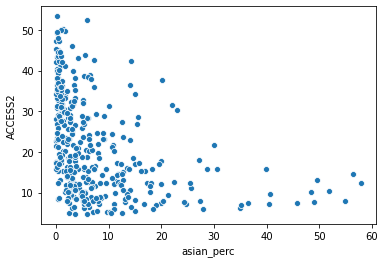

In [93]:
sns.scatterplot(x='asian_perc', y='ACCESS2', data=df)

In [70]:
X = df[['black_perc', 'asian_perc', 'two_plus_perc', 'other_perc2',
        'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
        'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
        'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
        'COREM', 'COREW']]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     30.48
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.78e-79
Time:                        23:46:05   Log-Likelihood:                -600.80
No. Observations:                 370   AIC:                             1266.
Df Residuals:                     338   BIC:                             1391.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.6743     13.704     -0.487      0.627     -33.631      20.282
black_perc        0.0315      0.009      3.559      0.000       0.014       0.049
asian_perc        0.0253      0.025      1.003      0.316      -0.024       0.075
two_plus_perc    -0.2978      0.091     -3.255      0.001      -0.478      -0.118
other_perc2       0.0962      0.017      5.565      0.000       0.062       0.130
BINGE             0.0525      0.107      0.492      0.623      -0.157       0.262
CSMOKING         -0.1001      0.181     -0.552      0.581      -0.457       0.257
LPA              -0.4533      0.129     -3.509      0.001      -0.707      -0.199
OBESITY           0.4412      0.102      4.339      0.000       0.241       0.641
SLEEP             0.8039      0.126      6.372      0.000       0.556       1.052
ARTHRITIS        -0.0571      0.355     -0.161      0.872      -0.756       0.642
CASTHMA          -1.8855      0.382     -4.932      0.000      -2.638      -1.133
BPHIGH           -0.4282      0.120     -3.567      0.000      -0.664      -0.192
CANCER            1.2935      0.723      1.788      0.075      -0.129       2.716
HIGHCHOL         -0.3981      0.085     -4.690      0.000      -0.565      -0.231
KIDNEY            0.1324      1.212      0.109      0.913      -2.251       2.516
COPD              0.1419      0.588      0.241      0.809      -1.014       1.298
CHD               0.9486      0.648      1.464      0.144      -0.326       2.223
DIABETES          0.1842      0.329      0.560      0.576      -0.463       0.831
MHLTH            -0.0571      0.335     -0.170      0.865      -0.717       0.603
PHLTH             1.3249      0.410      3.228      0.001       0.518       2.132
TEETHLOST        -0.1043      0.075     -1.391      0.165      -0.252       0.043
STROKE           -0.5084      0.845     -0.602      0.548      -2.170       1.153
ACCESS2           0.0281      0.056      0.499      0.618      -0.083       0.139
CHECKUP           0.1131      0.096      1.180      0.239      -0.075       0.301
DENTAL            0.3294      0.094      3.499      0.001       0.144       0.515
BPMED             0.0869      0.053      1.631      0.104      -0.018       0.192
CHOLSCREEN       -0.4306      0.103     -4.175      0.000      -0.633      -0.228
MAMMOUSE          0.0218      0.099      0.220      0.826      -0.173       0.217
COLON_SCREEN     -0.0547      0.073     -0.750      0.454      -0.198       0.089
COREM            -0.0265      0.090     -0.294      0.769      -0.204       0.151
COREW            -0.0401      0.068     -0.587      0.558      -0.175       0.094
==============================================================================
Omnibus:                       91.679   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [71]:
X = df[selected_features_black]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     34.79
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.16e-47
Time:                        23:47:26   Log-Likelihood:                -722.21
No. Observations:                 370   AIC:                             1466.
Df Residuals:                     359   BIC:                             1509.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.7702      6.572      1.335      0.183      -4.153      21.694
ACCESS2           0.0448      0.030      1.475      0.141      -0.015       0.105
two_plus_perc    -0.2378      0.105     -2.269      0.024      -0.444      -0.032
asian_perc       -0.0749      0.015     -5.002      0.000      -0.104      -0.045
CASTHMA          -0.2903      0.144     -2.013      0.045      -0.574      -0.007
other_perc2       0.0752      0.016      4.624      0.000       0.043       0.107
CANCER           -0.0841      0.157     -0.536      0.592      -0.393       0.225
BINGE            -0.2601      0.060     -4.354      0.000      -0.378      -0.143
TEETHLOST        -0.1192      0.033     -3.579      0.000      -0.185      -0.054
MAMMOUSE          0.2180      0.048      4.568      0.000       0.124       0.312
CHOLSCREEN       -0.1610      0.033     -4.844      0.000      -0.226      -0.096
==============================================================================
Omnibus:                       84.731   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.317
Skew:                           1.040   Prob(JB):                     9.84e-56
Kurtosis:                       6.480   Cond. No.                     8.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X = df[['black_perc', 'asian_perc', 'two_plus_perc', 'other_perc2']]
y = df["COVID_perc"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             COVID_perc   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     32.18
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           5.58e-23
Time:                        23:47:58   Log-Likelihood:                -791.68
No. Observations:                 370   AIC:                             1593.
Df Residuals:                     365   BIC:                             1613.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3812      0.349     12.566      0.000       3.696       5.067
black_perc       -0.0093      0.005     -2.013      0.045      -0.018      -0.000
asian_perc       -0.0802      0.013     -6.348      0.000      -0.105      -0.055
two_plus_perc    -0.1564      0.112     -1.401      0.162      -0.376       0.063
other_perc2       0.0750      0.013      5.692      0.000       0.049       0.101
==============================================================================
Omnibus:                      134.432   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.414
Skew:                           1.624   Prob(JB):                    8.64e-102
Kurtosis:                       7.432   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = df[['nonwhite_perc', 
        'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
        'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
        'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
        'COREM', 'COREW']]
y = df["COVID_perc"]

# split train and holdout dataset for both original data and reduced PCA data
train_size = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=12345)

In [ ]:
# define model
model = Lasso()

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.001)

# define search
grid = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

# perform the search
grid.fit(X_train, y_train)

# summarize
print('MAE: %.3f' % grid.best_score_)
print('Config: %s' % grid.best_params_)

grid_mean_scores = grid.cv_results_['mean_test_score']

plt.plot(np.arange(0, 1, 0.001), grid_mean_scores)
plt.xlabel('Value of lambda for Lasso')
plt.ylabel('MAE')
plt.show()

In [ ]:
model = Lasso(alpha = 0.001)
model.fit(X_train, y_train)

preds = model.predict(X_test)
preds

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

In [ ]:
model.coef_

In [ ]:
reg_feature_list = ['nonwhite_perc', 
                    'BINGE', 'CSMOKING', 'LPA', 'OBESITY', 'SLEEP', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 
                    'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DIABETES', 'MHLTH', 'PHLTH', 'TEETHLOST', 
                    'STROKE', 'ACCESS2', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'COLON_SCREEN', 
                    'COREM', 'COREW']
for i in zip(reg_feature_list, model.coef_):
    print(i)